In [1]:
import pandas as pd
import sklearn

money = pd.read_csv('usd_exchange_rate.csv')
values = money['curs']

past_days = 7*4
future_days = 7

start = past_days
end = len(values) - future_days
print(start,end)

raw_df =[]
for i in range(start, end):
    past_and_future_values = values[(i-past_days):(i+future_days)]
    raw_df.append(list(past_and_future_values))
    
past_columns = [f'past_{i}' for i in range(past_days)]
future_columns = [f'future_{i}' for i in range(future_days)]

df = pd.DataFrame(raw_df, columns=(past_columns + future_columns))

# Тренировочная выборка, "Учебник"
X_in = df[past_columns][:-1]  # Факторы, по которым делается предсказание
Y_out = df[future_columns][:-1] # ТО, что мы собираемся предсказывать

# Тестовая выборка, "экзамен"
X_test = df[past_columns][-1:]
Y_test = df[future_columns][-1:]

28 939


In [3]:
from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor()
MLP

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [14]:
#GridSearch

# Grid = набор параметров, среди которых мы ищем оптимальные
# Search = то что мы ищем
# CV = cross validation = кросс-валидация
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

grid_serach = GridSearchCV(MLP, {'activation': ['identity', 'logistic','tanh', 'relu'],
                                  'learning_rate': ['constant', 'invscaling', 'adaptive'],
                                  'max_iter': [200,1000,2000],
                                  })

In [5]:
grid_serach.fit(X_in, Y_out)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To speci

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_iter=200,
                                    momentum=0.9, n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random...=None, shuffle=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'rel

In [7]:
print(grid_serach.best_params_)
print(grid_serach.best_index_)
print(grid_serach.best_score_)

{'activation': 'relu', 'learning_rate': 'constant', 'max_iter': 2000}
29
0.4618098282623891


In [8]:
grid_serach.best_estimator_

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=2000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [9]:
best_MLP = grid_serach.best_estimator_

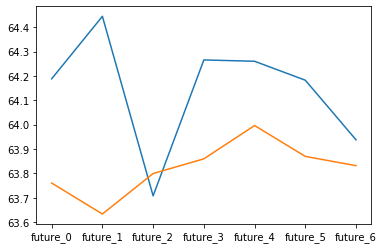

In [12]:
prediction = best_MLP.predict(X_test)
plt.plot(prediction[0], label = 'prediction')
plt.plot(Y_test.iloc[0], label= 'real')
plt.show()

In [15]:
#средняя абсолютная ошибка
print('best средняя абсолютная ошибка', mean_absolute_error(Y_test, prediction))
#средняя квадратичная ошибка
print('best средняя квадратичная ошибка', mean_squared_error(Y_test, prediction))

best средняя абсолютная ошибка 0.3455438108211431
best средняя квадратичная ошибка 0.17037320149690818


In [17]:
best_MLP

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=2000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [20]:
#Сохранение лучшей модели с помощью pickle
import pickle

pickle.dump(best_MLP, open('BEST_MLP_MODEL.pickle', 'bw'))

In [21]:
#Загрузка лучшей модели с помощью pickle
load_MLP = pickle.load(open('BEST_MLP_MODEL.pickle', 'br'))
load_MLP

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=2000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)